# Digit Recognizer

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## 1. Load and Prepare Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

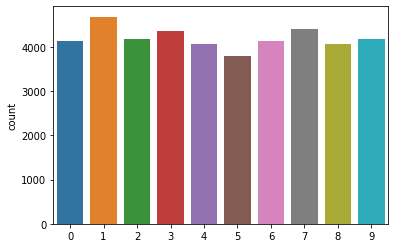

In [3]:
x_train = train.drop("label", axis=1).to_numpy()
y_train = train["label"].to_numpy()
label_counts = sns.countplot(y_train)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

# 2. Train
## 2.1. Multiclass classification

In [5]:
# Support vector classifier using one vs one strategy
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf_scores = cross_val_score(svm_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
svm_clf_scores.mean()

0.9562380952380952

In [6]:
# Support vector classifier using one vs rest strategy
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf_scores = cross_val_score(ovr_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
ovr_clf_scores.mean()

0.9564761904761906

In [7]:
# Stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_scores = cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
sgd_clf_scores.mean()

0.9084761904761903

In [8]:
# K-nearest neighbours classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf_scores = cross_val_score(knn_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
knn_clf_scores.mean()

0.9387619047619048

In [9]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf_scores = cross_val_score(rnd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
rnd_clf_scores.mean()

0.9607380952380953

## 2.2. Neural networks and deep learning

In [15]:
x_train = x_train / 255.
x_train_reshaped = x_train.reshape(-1,28,28,1)
x_train_reshaped.shape

(42000, 28, 28, 1)